In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

In [4]:
path = '/gpfsm/dhome/jjbuseck/jjbuseck/models/MOM6_dev/geoclim-mom6/MOM6_SIS2_COBALT/datasets/forcing'

In [5]:
MF_FE_PI = xr.open_dataset(os.path.join(path,'Mineral_Fe_Flux_PI.nc'))
MF_FE_PI

<xarray.Dataset>
Dimensions:       (Time: 12, lat: 73, lon: 150)
Coordinates:
  * lon           (lon) float32 1.2 3.6 6.0 8.4 ... 353.9995 356.3995 358.7995
  * lat           (lat) float32 -86.4 -84.0 -81.6 ... 81.60005 84.00005 86.40005
  * Time          (Time) object 0001-01-16 00:00:00 ... 0001-12-17 00:00:00
Data variables:
    FLUX          (Time, lat, lon) float32 ...
    FLUX_MINERAL  (Time, lat, lon) float32 ...
Attributes:
    title:    GCTM_NCEP Soluble Fe Simulations with 1860 HNO3 and SO2
    history:  FERRET V5.70   20-Sep-06

In [6]:
FE_PI = xr.open_dataset(os.path.join(path,'Soluble_Fe_Flux_PI.nc'))
FE_PI

<xarray.Dataset>
Dimensions:  (Time: 12, lat: 73, lon: 150)
Coordinates:
  * lon      (lon) float32 1.2 3.6 6.0 8.4 ... 353.9995 356.3995 358.7995
  * lat      (lat) float32 -86.4 -84.0 -81.6 ... 81.60005 84.00005 86.40005
  * Time     (Time) object 0001-01-16 00:00:00 ... 0001-12-17 00:00:00
Data variables:
    FLUX     (Time, lat, lon) float32 ...
Attributes:
    title:    GCTM_NCEP Soluble Fe Simulations with 1860 HNO3 and SO2

In [9]:
xr.testing.assert_allclose(MF_FE_PI.FLUX, FE_PI.FLUX)
# ok so these are the same

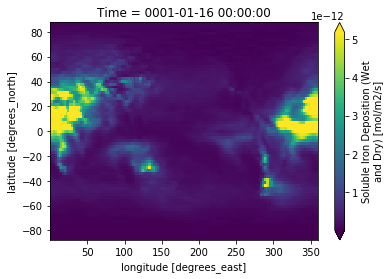

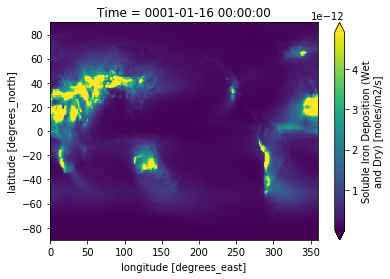

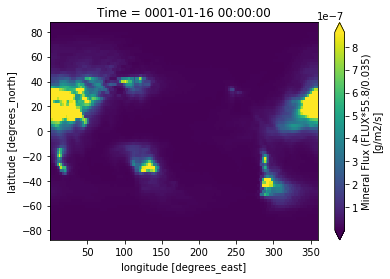

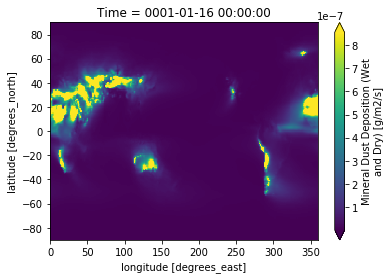

In [13]:
# Quick check if they look similar to the previous files

FE_REF = xr.open_dataset(os.path.join(path,'Soluble_Fe_Flux_AM4.nc'))

MF_REF = xr.open_dataset(os.path.join(path,'Mineral_Flux_AM4.nc'))

plt.figure()
FE_PI.FLUX.isel(Time=0).plot(robust=True)

plt.figure()
FE_REF.FLUX.isel(Time=0).plot(robust=True)

plt.figure()
MF_FE_PI.FLUX_MINERAL.isel(Time=0).plot(robust=True)

plt.figure()
MF_REF.FLUX_MINERAL.isel(Time=0).plot(robust=True)

In [14]:
# now the depfluxes

In [15]:
depf_PI = xr.open_dataset(os.path.join(path,'depflux_total.mean.1860.nc'))
depf_90 = xr.open_dataset(os.path.join(path,'depflux_total.mean.1990.nc'))

depf_90

<xarray.Dataset>
Dimensions:      (Time: 12, lat: 64, lon: 128)
Coordinates:
  * Time         (Time) object 0001-01-16 00:00:00 ... 0001-12-17 00:00:00
  * lat          (lat) float32 -90.0 -87.14286 -84.28571 ... 87.14286 90.0
  * lon          (lon) float32 0.0 2.8125 5.625 ... 351.5625 354.375 357.1875
Data variables:
    NO3_WET_DEP  (Time, lat, lon) float32 ...
    NO3_DRY_DEP  (Time, lat, lon) float32 ...
    NH4_WET_DEP  (Time, lat, lon) float32 ...
    NH4_DRY_DEP  (Time, lat, lon) float32 ...

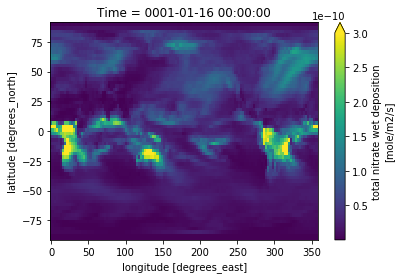

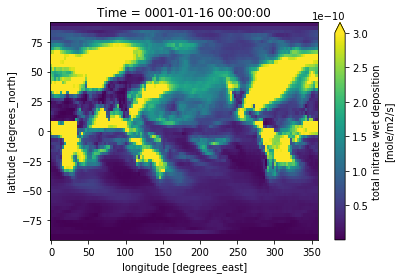

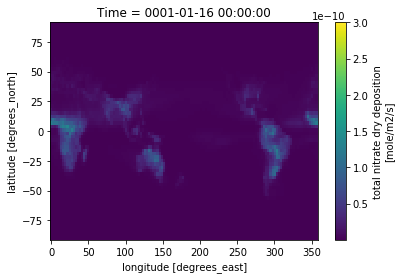

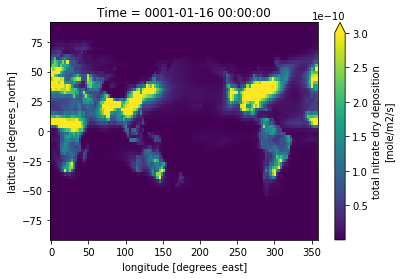

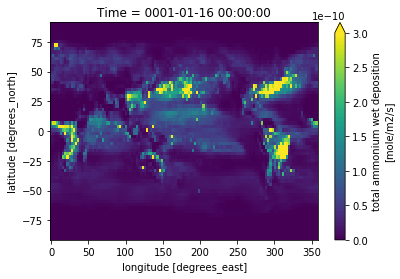

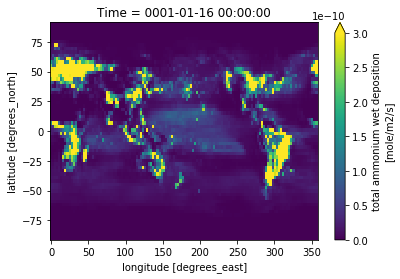

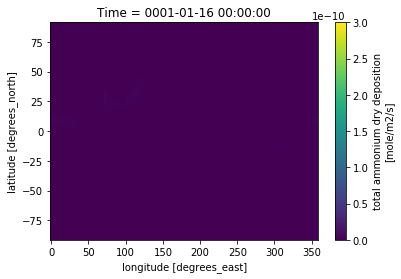

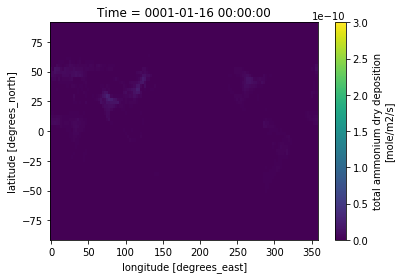

In [19]:
# var
for dvar in depf_90.data_vars:
    plt.figure()
    depf_PI[dvar].isel(Time=0).plot(vmax=3e-10)
    plt.figure()
    depf_90[dvar].isel(Time=0).plot(vmax=3e-10)

These are quite different. Make a note.